In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("titanic.csv")
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [15]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['sex']=le_sex.fit_transform(df.Sex)
df

,Survived,Pclass,Sex,Age,Fare,sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [20]:
key =dict()
for i in range(len(le_sex.classes_)):
    key[i]=le_sex.classes_[i]
key

{0: 'female', 1: 'male'}

In [26]:
df.drop("Sex",inplace=True,axis=1)
df

,Survived,Pclass,Age,Fare,sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [35]:
import math
mean  = math.floor(df.Age.mean())
df.Age.fillna(mean,inplace=True)
df

,Survived,Pclass,Age,Fare,sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,29.0,23.4500,0
889,1,1,26.0,30.0000,1


In [36]:
from sklearn import tree
mod = tree.DecisionTreeClassifier()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived",axis=1),df.Survived)

In [39]:
mod.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
mod.score(X_test,y_test)

0.8026905829596412

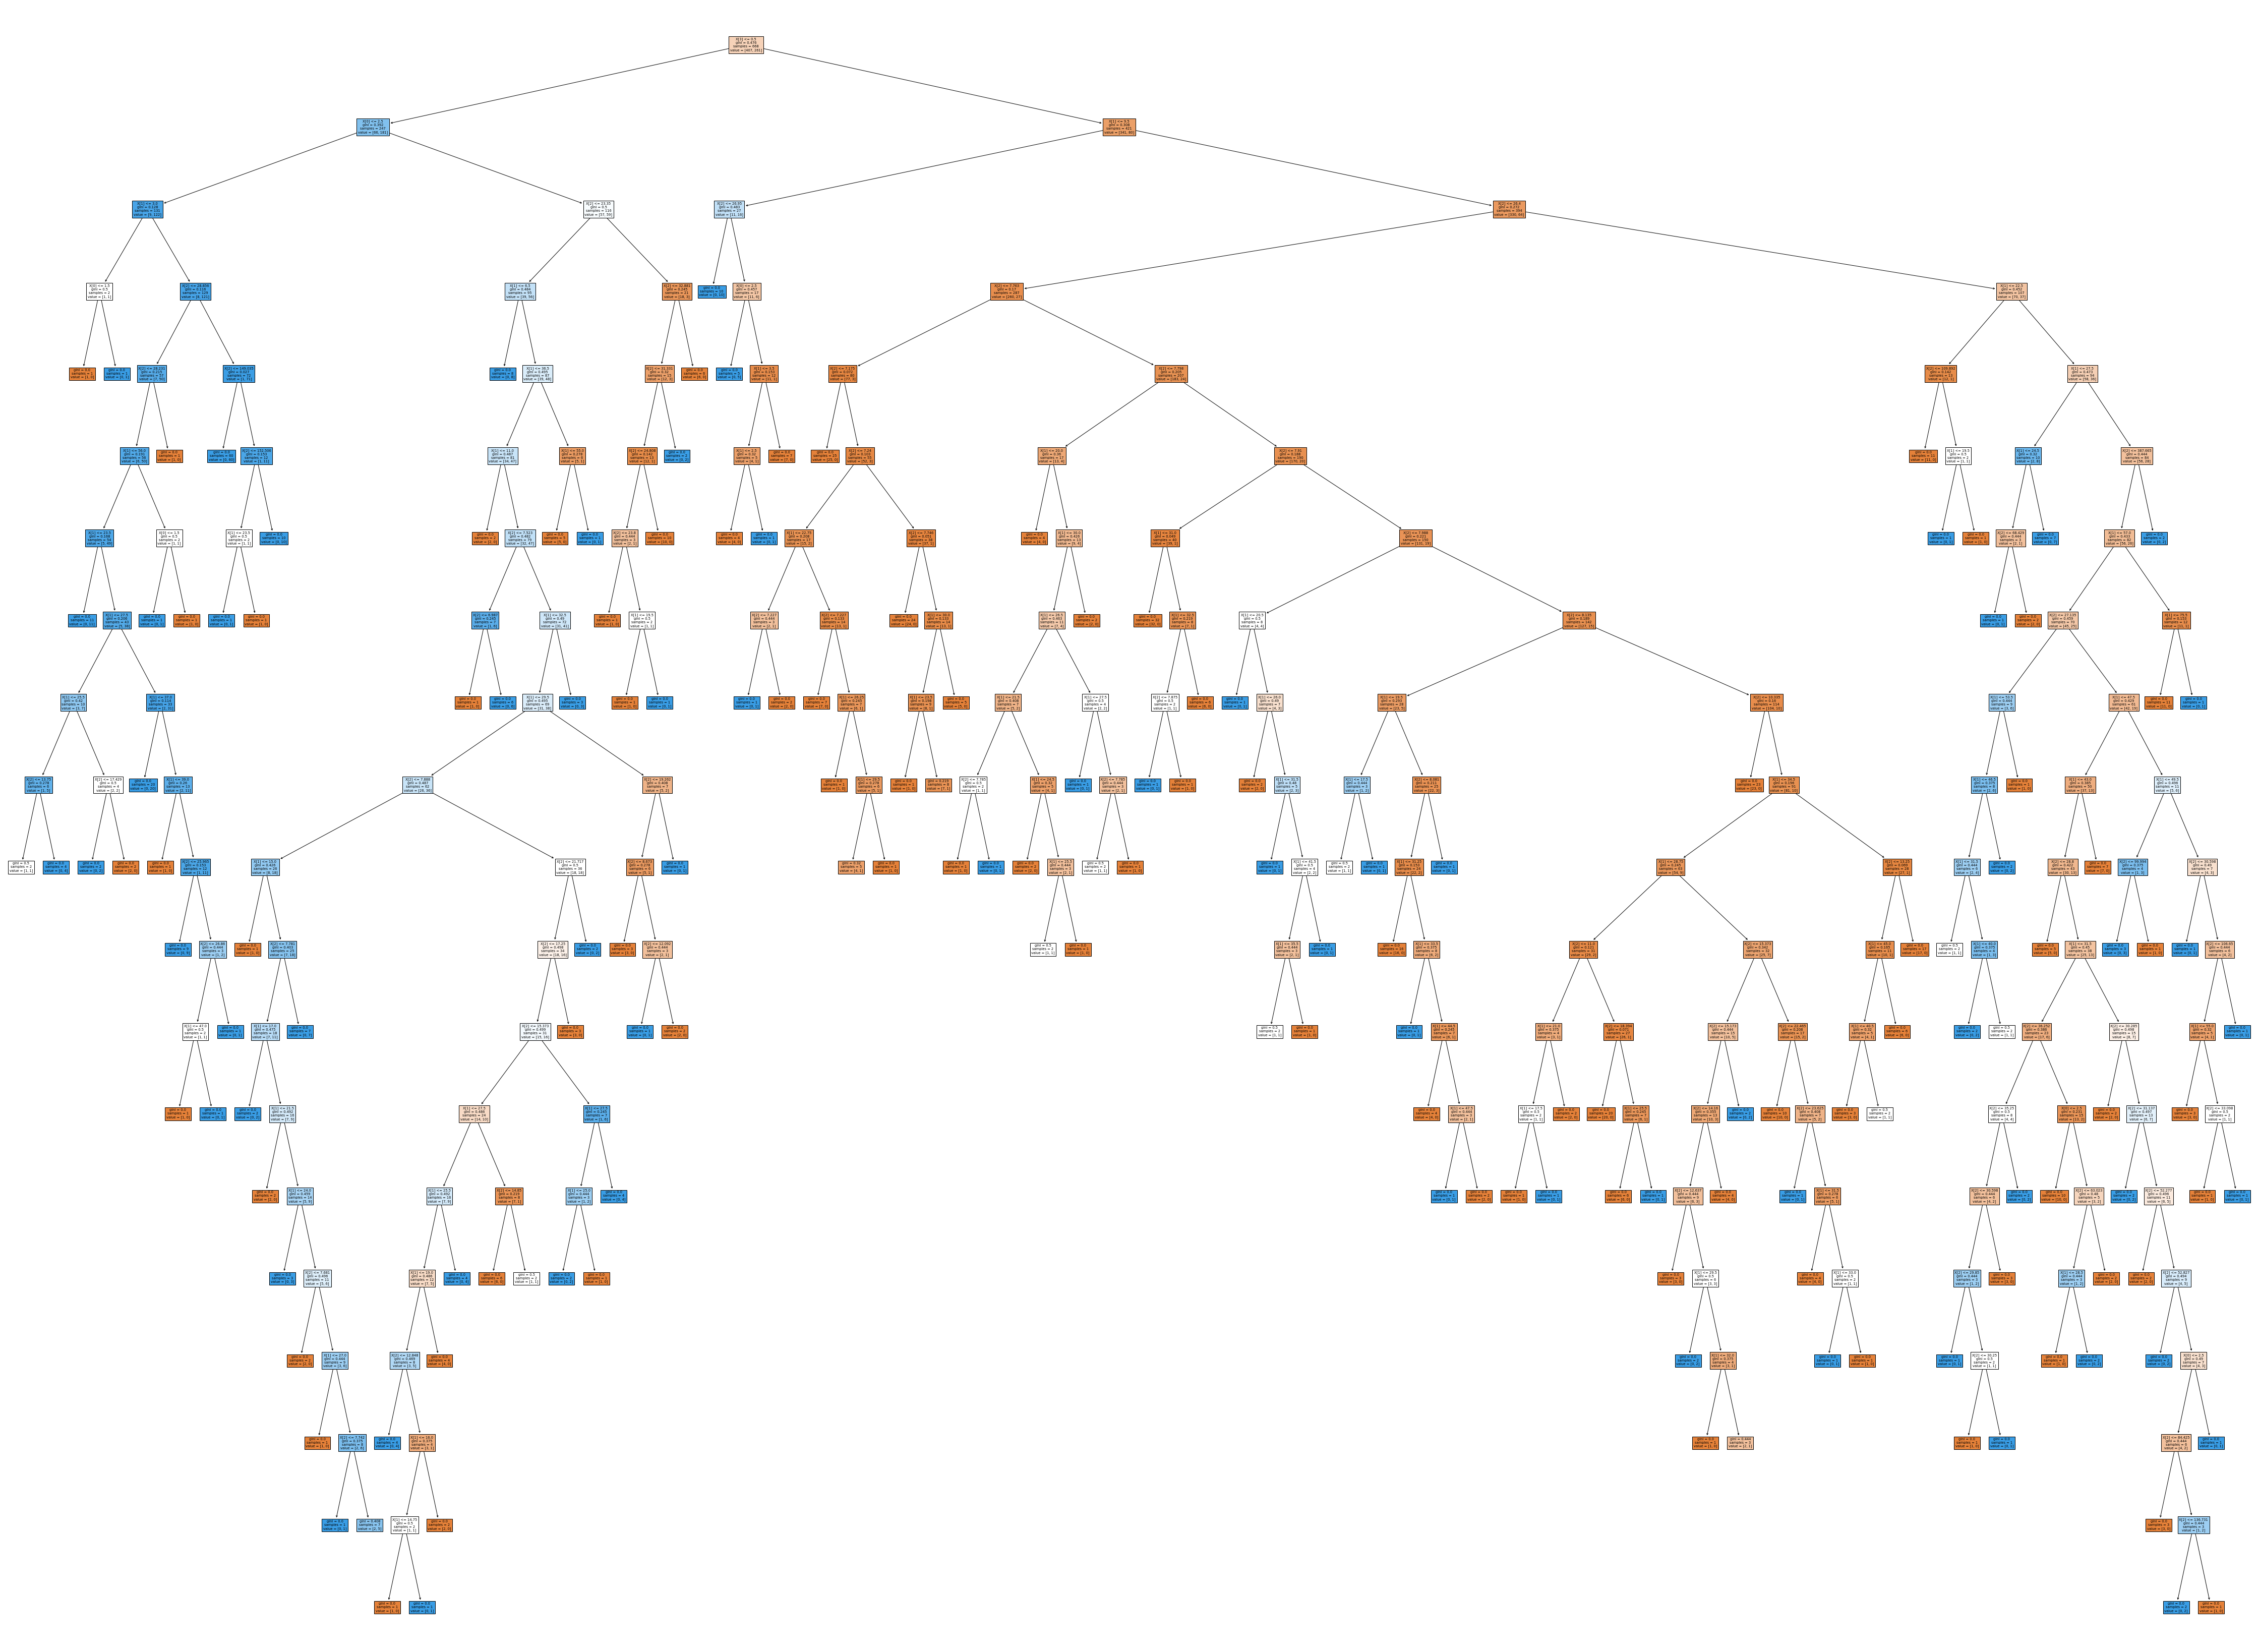

In [48]:
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(80,60))
plot_tree(mod,filled=True)
plt.show()